In [1]:
#1. Load and Preprocess Data
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('taxi_data.csv')

# Convert datetime columns to datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Create new features: ride duration, hour of the day, day of the week
df['ride_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60  # duration in minutes
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek

# Handle missing values (if any)
df = df.dropna()


In [12]:
df

,pickup_datetime,dropoff_datetime,pickup_location,dropoff_location,distance,fare_amount,ride_duration,pickup_hour,pickup_day
0,2024-06-22 14:54:00,2024-06-22 15:17:00,Location_A,Location_B,5.65,19.50,23.0,14,5
1,2024-07-08 02:12:00,2024-07-08 02:35:00,Location_D,Location_A,13.42,37.75,23.0,2,0
2,2024-07-04 19:20:00,2024-07-04 19:50:00,Location_B,Location_C,9.58,28.90,30.0,19,3
3,2024-06-25 09:45:00,2024-06-25 10:10:00,Location_A,Location_D,7.23,22.10,25.0,9,1
4,2024-07-03 15:30:00,2024-07-03 15:55:00,Location_C,Location_B,3.78,12.50,25.0,15,2
5,2024-07-06 07:15:00,2024-07-06 07:40:00,Location_B,Location_A,6.45,17.00,25.0,7,5
6,2024-06-30 21:10:00,2024-06-30 21:35:00,Location_D,Location_C,8.29,24.80,25.0,21,6
7,2024-06-26 12:55:00,2024-06-26 13:20:00,Location_A,Location_B,4.95,14.75,25.0,12,2
8,2024-07-01 18:25:00,2024-07-01 18:50:00,Location_C,Location_D,12.34,35.60,25.0,18,0
9,2024-06-28 03:40:00,2024-06-28 04:05:00,Location_B,Location_A,2.56,9.25,25.0,3,4


           pickup_datetime     dropoff_datetime   distance  fare_amount  \
count                   10                   10  10.000000    10.000000   
mean   2024-06-30 19:42:36  2024-06-30 20:07:42   7.425000    22.215000   
min    2024-06-22 14:54:00  2024-06-22 15:17:00   2.560000     9.250000   
25%    2024-06-26 22:36:15  2024-06-26 23:01:15   5.125000    15.312500   
50%    2024-07-01 07:47:30  2024-07-01 08:12:30   6.840000    20.800000   
75%    2024-07-04 12:22:30  2024-07-04 12:51:15   9.257500    27.875000   
max    2024-07-08 02:12:00  2024-07-08 02:35:00  13.420000    37.750000   
std                    NaN                  NaN   3.538811     9.572212   

       ride_duration  pickup_hour  pickup_day  
count      10.000000    10.000000   10.000000  
mean       25.100000    12.000000    2.800000  
min        23.000000     2.000000    0.000000  
25%        25.000000     7.500000    1.250000  
50%        25.000000    13.000000    2.500000  
75%        25.000000    17.250000   

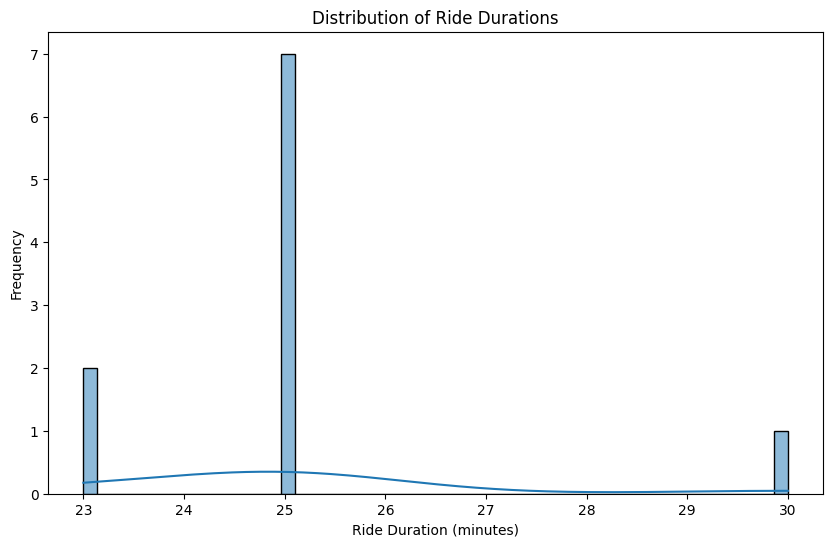

In [2]:
#2. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Summary statistics
print(df.describe())

# Plot distribution of ride durations
plt.figure(figsize=(10, 6))
sns.histplot(df['ride_duration'], bins=50, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()



C:\Users\VENU\AppData\Local\Temp\ipykernel_2900\3559832541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=df, palette='viridis')


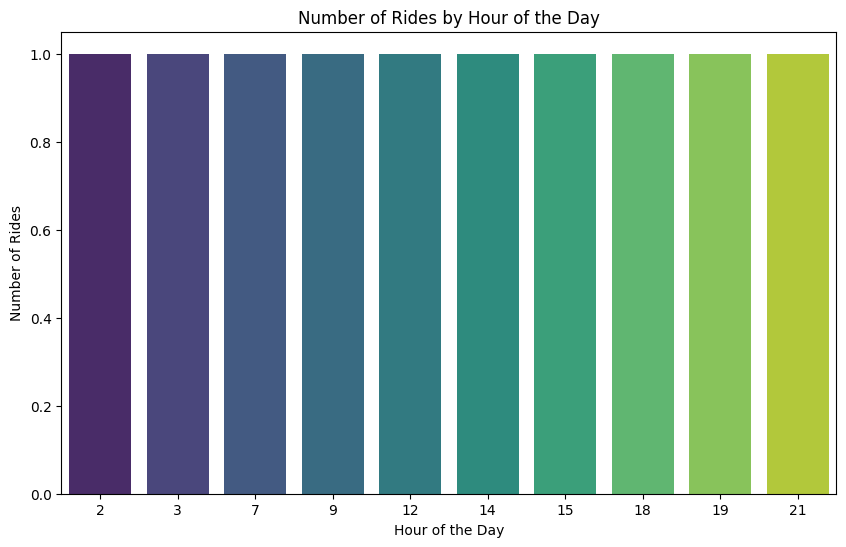

In [3]:
# Plot pickup demand by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()



C:\Users\VENU\AppData\Local\Temp\ipykernel_2900\2436414569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_day', data=df, palette='viridis')


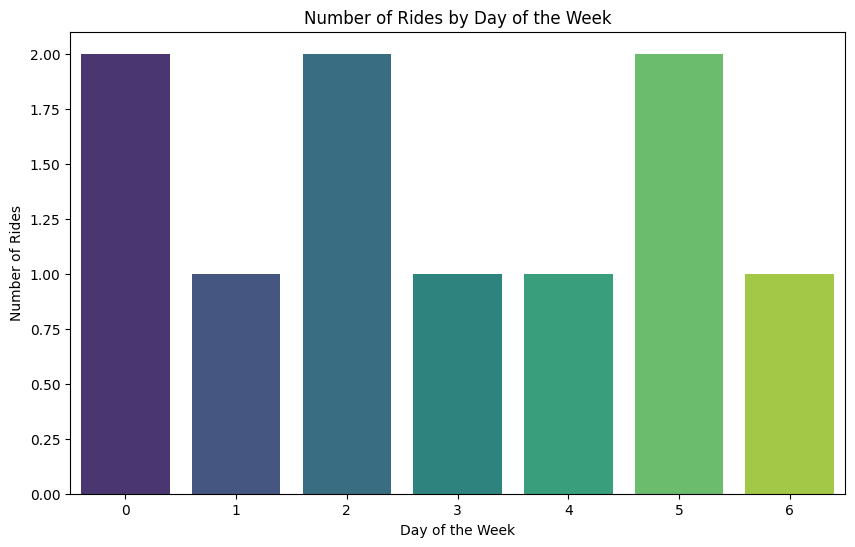

In [4]:
# Plot demand by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day', data=df, palette='viridis')
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


In [5]:
#3. Demand Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df[['pickup_hour', 'pickup_day']]
y = df['ride_duration']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.812498344013411


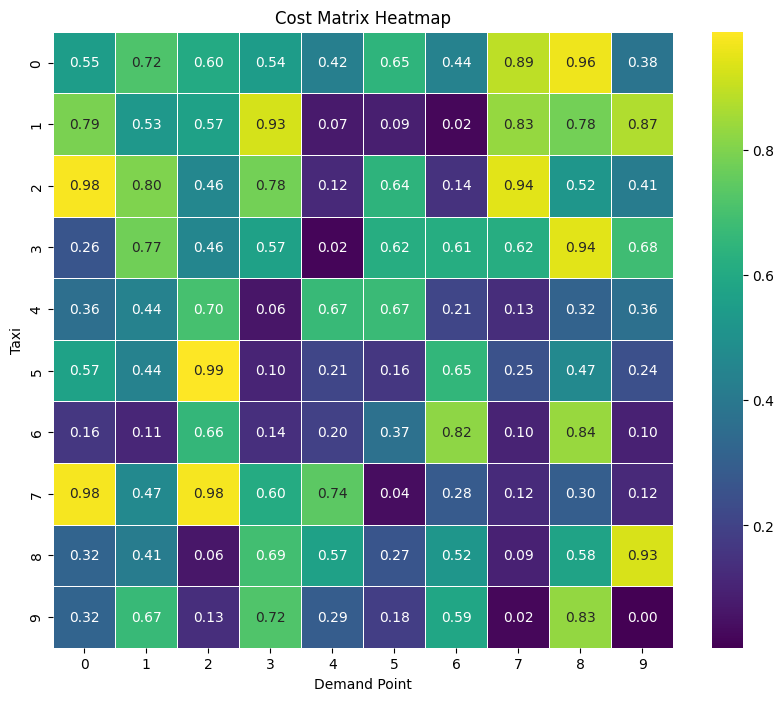

C:\Users\VENU\AppData\Local\Temp\ipykernel_2900\4272630964.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Taxi', y='Demand Point', size='Cost', sizes=(100, 1000), data=assignments_df, palette='viridis', legend=None)


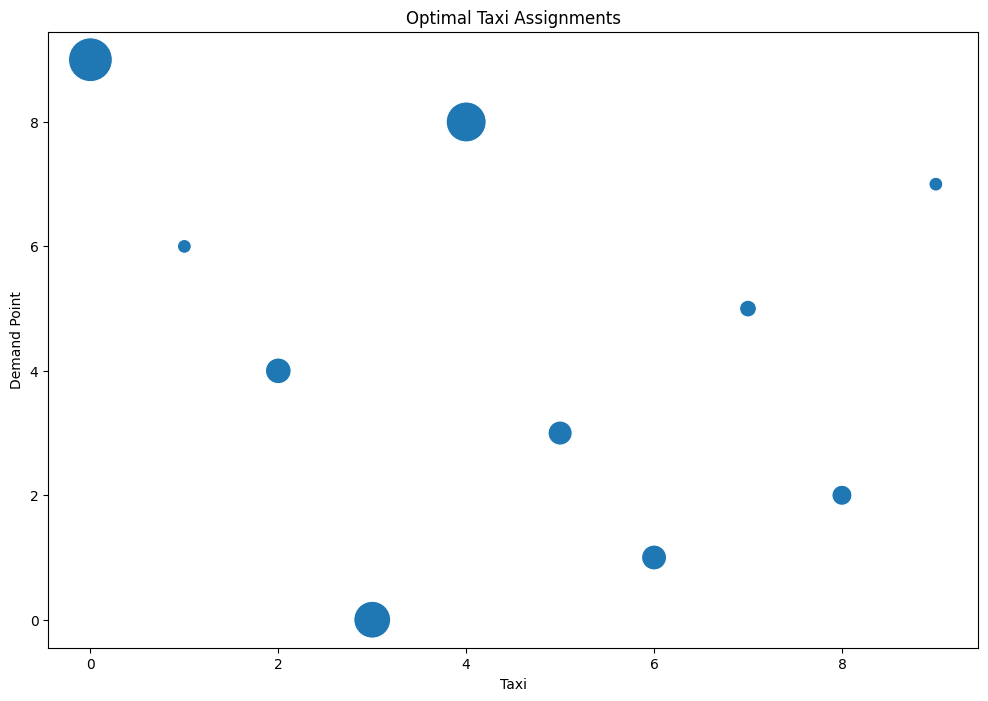

Total Minimized Cost: 1.44


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd

# Generate a random cost matrix for demonstration
np.random.seed(0)
num_taxis = 10
num_demand_points = 10
cost_matrix = np.random.rand(num_taxis, num_demand_points)

# 1. Visualizing the Cost Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cost_matrix, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Cost Matrix Heatmap')
plt.xlabel('Demand Point')
plt.ylabel('Taxi')
plt.show()

# 2. Visualizing the Optimal Assignments
row_ind, col_ind = linear_sum_assignment(cost_matrix)
optimal_assignments = [(taxi, demand_point, cost_matrix[taxi, demand_point]) for taxi, demand_point in zip(row_ind, col_ind)]
assignments_df = pd.DataFrame(optimal_assignments, columns=['Taxi', 'Demand Point', 'Cost'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Taxi', y='Demand Point', size='Cost', sizes=(100, 1000), data=assignments_df, palette='viridis', legend=None)
plt.title('Optimal Taxi Assignments')
plt.xlabel('Taxi')
plt.ylabel('Demand Point')
plt.show()

# 3. Display Total Minimized Cost
total_cost = cost_matrix[row_ind, col_ind].sum()
print(f"Total Minimized Cost: {total_cost:.2f}")


In [8]:
# Create a random cost matrix (e.g., representing distances or costs)
num_taxis = 10  # Number of taxis
num_demand_points = 10  # Number of demand points

# Generate random cost matrix
np.random.seed(0)
cost_matrix = np.random.rand(num_taxis, num_demand_points)

# Use the Hungarian algorithm to minimize the total cost
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Display the optimal assignment
print("Optimal Taxi Assignments:")
for taxi, demand_point in zip(row_ind, col_ind):
    print(f"Taxi {taxi} assigned to Demand Point {demand_point} with cost {cost_matrix[taxi, demand_point]:.2f}")

# Display the total minimized cost
total_cost = cost_matrix[row_ind, col_ind].sum()
print(f"Total Minimized Cost: {total_cost:.2f}")


Optimal Taxi Assignments:
Taxi 0 assigned to Demand Point 9 with cost 0.38
Taxi 1 assigned to Demand Point 6 with cost 0.02
Taxi 2 assigned to Demand Point 4 with cost 0.12
Taxi 3 assigned to Demand Point 0 with cost 0.26
Taxi 4 assigned to Demand Point 8 with cost 0.32
Taxi 5 assigned to Demand Point 3 with cost 0.10
Taxi 6 assigned to Demand Point 1 with cost 0.11
Taxi 7 assigned to Demand Point 5 with cost 0.04
Taxi 8 assigned to Demand Point 2 with cost 0.06
Taxi 9 assigned to Demand Point 7 with cost 0.02
Total Minimized Cost: 1.44


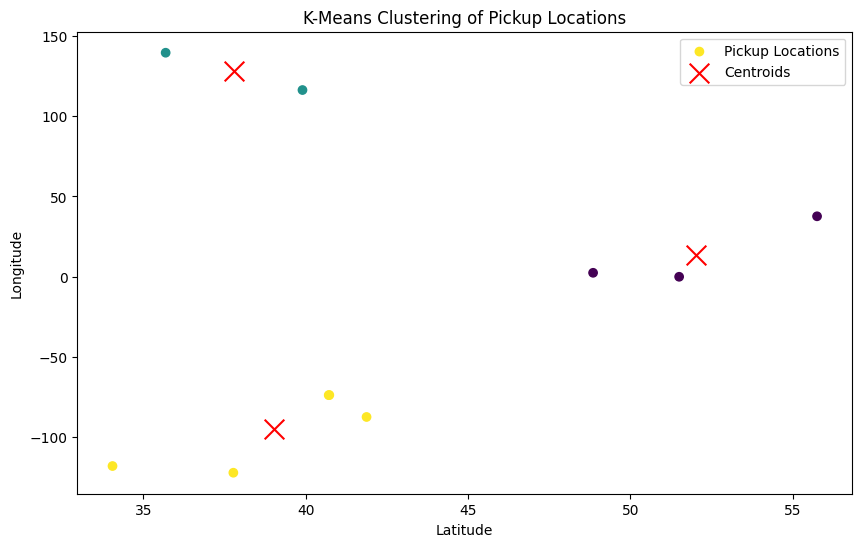

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data for demonstration purposes
pickup_locations = np.array([
    [40.7128, -74.0060],  # Latitude and Longitude of pickup locations
    [34.0522, -118.2437],
    [41.8781, -87.6298],
    [37.7749, -122.4194],
    [51.5074, -0.1278],
    [48.8566, 2.3522],
    [35.6895, 139.6917],
    [39.9042, 116.4074],
    [55.7558, 37.6173],
    [40.7306, -73.9352]
])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(pickup_locations)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pickup_locations[:, 0], pickup_locations[:, 1], c=labels, cmap='viridis', marker='o', label='Pickup Locations')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering of Pickup Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()


Mean Squared Error: 61.60625000000003


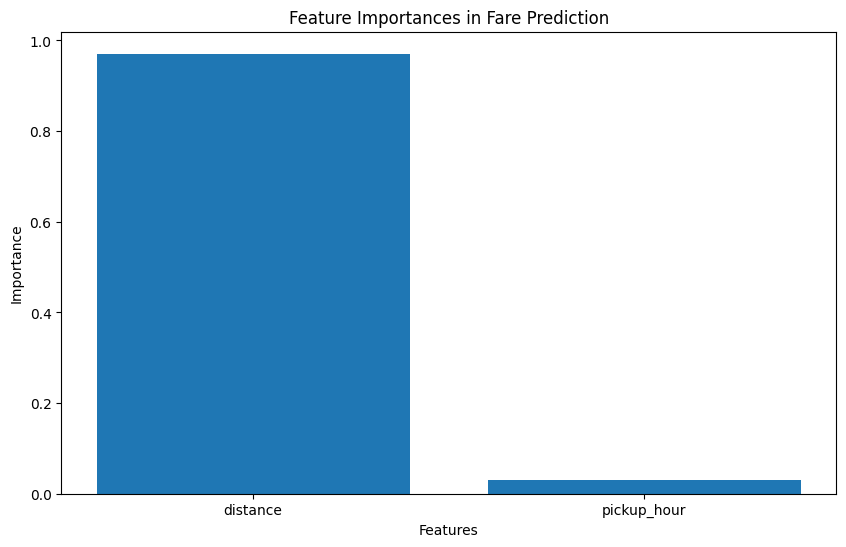

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df[['distance', 'pickup_hour']]  # Example features
y = df['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
plt.bar(X.columns, feature_importances)
plt.title('Feature Importances in Fare Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


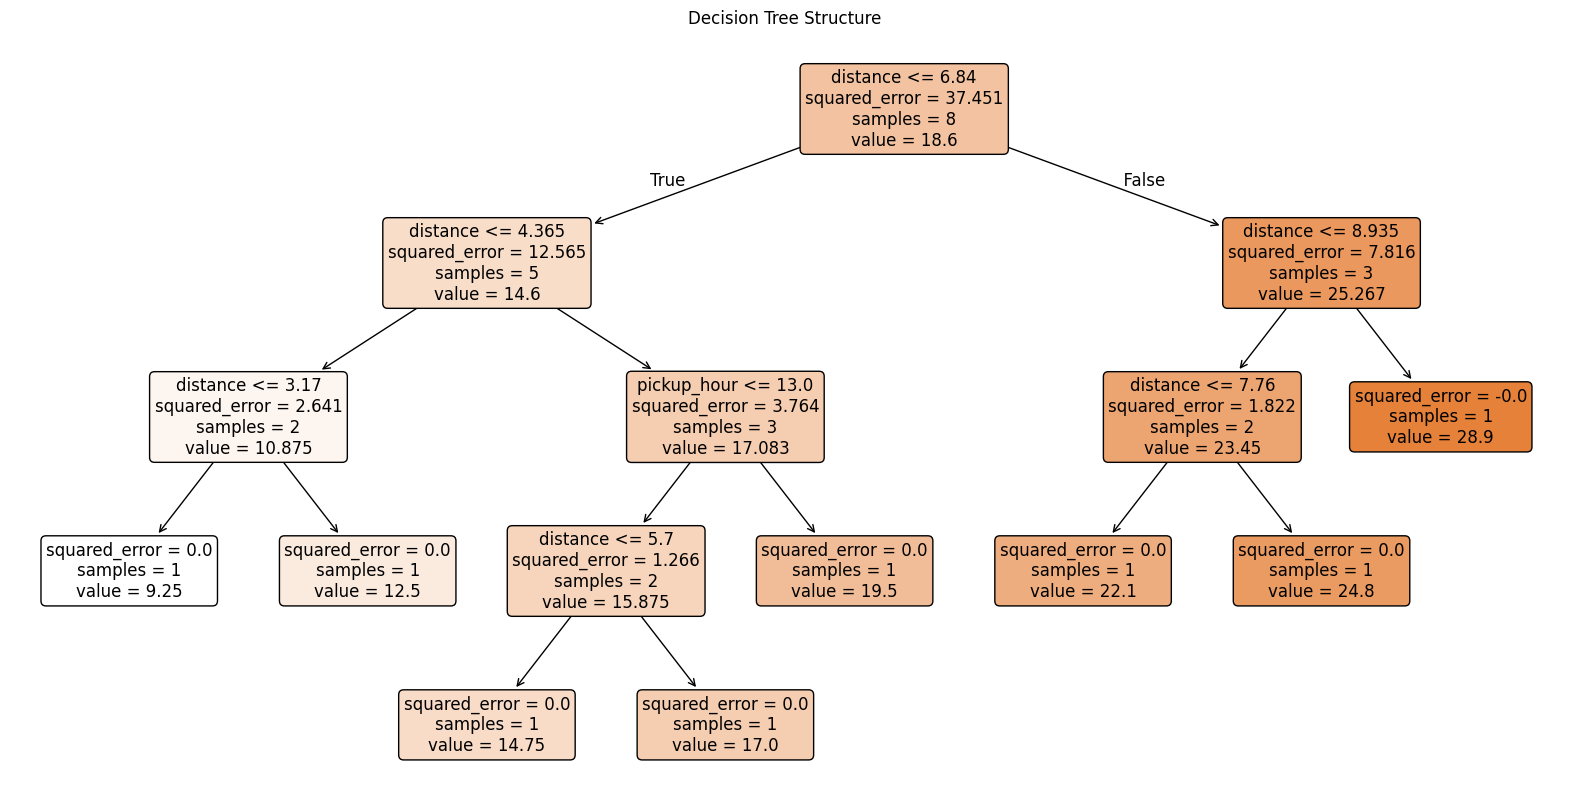

In [13]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Structure')
plt.show()
